In [ ]:
import os
# Version for filename
ver = 'GRU'  # GRU or LSTM

date = "mother_folder"
dl_folder = f"base_path/{date}_DL"

dl_number = "project_name"
#os.mkdir(f"{dl_folder}/model_{dl_number}")

In [ ]:
fs = 20  # sampling rate
look_frame = 30  

In [ ]:
import numpy as np

model_number = 3  # typical model

input_train = np.load(f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_train_features.npy")
trainY      = np.load(f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_train_targets.npy")

input_valid = np.load(f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_valid_features.npy", )

In [ ]:
print(input_train.shape)
print(trainY.shape)

print(input_valid.shape)
print(validY.shape)

(960, 31, 10)
(960,)
(300, 31, 10)
(300,)


In [5]:
from tensorflow.keras.models import Sequential, load_model

epoch_number = 29

model_file_path = f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_ver{ver}_epoch{epoch_number}.h5"
model = load_model(model_file_path)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Calcurate accuracy
model.evaluate(input_valid, validY)

300/300 [==============================] - 1s 3ms/sample - loss: 0.4414 - acc: 0.8233


[0.44140217239658036, 0.8233333]

In [ ]:
# Predict
train_pred = model.predict(input_train)
valid_pred = model.predict(input_valid)

In [ ]:
# Label
train_target = trainY
valid_target = validY

In [ ]:
prediction_frames = 30  # frames per experiment
print(prediction_frames)

30


In [ ]:
# set time frames

# start time
start_value = 0.0 + (look_frame/fs)

# increase per frames
increment = 1/fs

# frames
count = prediction_frames

t = [start_value + i * increment for i in range(count)]

In [ ]:
np.save(f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_truth_train.npy", train_target)
np.save(f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_prediction_train.npy", train_pred)
np.save(f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_truth_valid.npy", valid_target)
np.save(f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_prediction_valid.npy", valid_pred)

In [ ]:
import numpy as np

fpr_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_train_fpr.npy"))
tpr_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_train_tpr.npy"))
AUC_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_train_auc.npy"))
opt_thr_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_train_threshold.npy"))

fpr_va = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_valid_fpr.npy"))
tpr_va = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_valid_tpr.npy"))
AUC_va = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_valid_auc.npy"))
opt_thr_va = np.load((f"{dl_folder}/model_{dl_number}/model_{model_number}/{date}_{dl_number}_valid_threshold.npy"))

In [ ]:
import tqdm
import numpy as np
import os

all_tr_fpr = []
all_tr_tpr = []
all_tr_AUC = []
all_tr_opt_thr = []

all_va_fpr = []
all_va_tpr = []
all_va_AUC = []
all_va_opt_thr = []

for n in tqdm.tqdm(range(5)):
    model_dir = os.path.join(os.path.join(dl_folder, f"model_{dl_number}"), f"model_{n}")

    fpr_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_train_fpr.npy"))
    tpr_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_train_tpr.npy"))
    AUC_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_train_auc.npy"))
    opt_thr_tr = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_train_threshold.npy"))
    all_tr_fpr.append(fpr_tr)
    all_tr_tpr.append(tpr_tr)
    all_tr_AUC.append(AUC_tr)
    all_tr_opt_thr.append(opt_thr_tr)

    fpr_va = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_valid_fpr.npy"))
    tpr_va = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_valid_tpr.npy"))
    AUC_va = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_valid_auc.npy"))
    opt_thr_va = np.load((f"{dl_folder}/model_{dl_number}/model_{n}/{date}_{dl_number}_valid_threshold.npy"))
    all_va_fpr.append(fpr_va)
    all_va_tpr.append(tpr_va)
    all_va_AUC.append(AUC_va)
    all_va_opt_thr.append(opt_thr_va)

all_tr_AUC = np.array(all_tr_AUC)
all_tr_opt_thr = np.array(all_tr_opt_thr)

all_va_AUC = np.array(all_va_AUC)
all_va_opt_thr = np.array(all_va_opt_thr)

100%|██████████| 5/5 [00:00<00:00, 10.95it/s]


In [4]:
np.save((f"{dl_folder}/model_{dl_number}/{date}_{dl_number}_valid_auc_best.npy"), all_va_AUC)

In [ ]:
AUC_tr = np.mean(all_tr_AUC)
opt_thr_tr = np.mean(all_tr_opt_thr)

AUC_va = np.mean(all_va_AUC)
opt_thr_va = np.mean(all_va_opt_thr)

In [ ]:
print(f"TRAIN best threshold ; {opt_thr_tr}")
print(f"VALID best threshold ; {opt_thr_va}")

TRAIN best threshold ; 0.5402618646621704
VALID best threshold ; 0.4312221109867096


In [ ]:
fpr_tr, tpr_tr = all_tr_fpr[model_number], all_tr_tpr[model_number]
fpr_va, tpr_va = all_va_fpr[model_number], all_va_tpr[model_number]

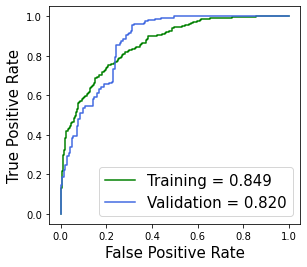

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.5, 4))

plt.plot(fpr_tr, tpr_tr, label="Training = {:.3f}".format(AUC_tr), color='green')

plt.plot(fpr_va, tpr_va, label="Validation = {:.3f}".format(AUC_va), color='royalblue')

plt.legend(fontsize=15) 
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.show()

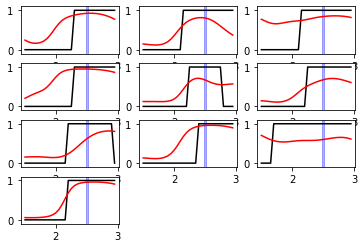

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

for ex in range(int(valid_target.shape[0]/prediction_frames)):
    plt.subplot(4, 3, ex+1)
    plt.plot(t, valid_target[ex*prediction_frames:(ex+1)*prediction_frames], color='black')
    plt.plot(t, valid_pred[ex*prediction_frames:(ex+1)*prediction_frames, 0], color='red')
    plt.axvspan(2.48, 2.52, color='blue', alpha=0.3)
    plt.ylim(-0.1, 1.1)
    
plt.show()

In [17]:
classified_valid_pred = []
for f in range(valid_pred.shape[0]):
    if valid_pred[f, 0] > all_va_opt_thr[model_number]:
        classified_valid_pred.append(1)
    else:
        classified_valid_pred.append(0)

classified_valid_pred = np.array(classified_valid_pred)
print(classified_valid_pred.shape)

(300,)


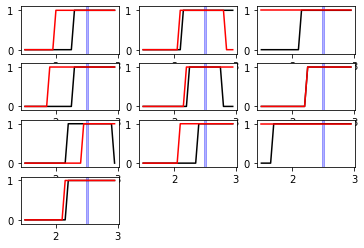

In [ ]:
plt.figure(figsize=(6, 4))

for ex in range(int(valid_target.shape[0]/prediction_frames)):
    plt.subplot(4, 3, ex+1)
    plt.plot(t, valid_target[ex*prediction_frames:(ex+1)*prediction_frames], color='black')
    plt.plot(t, classified_valid_pred[ex*prediction_frames:(ex+1)*prediction_frames], color='red')
    plt.axvspan(2.48, 2.52, color='blue', alpha=0.3)
    plt.ylim(-0.1, 1.1)
    
plt.show()